In [47]:
import pandas as pd
import numpy as np

df = pd.read_csv("diamonds.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

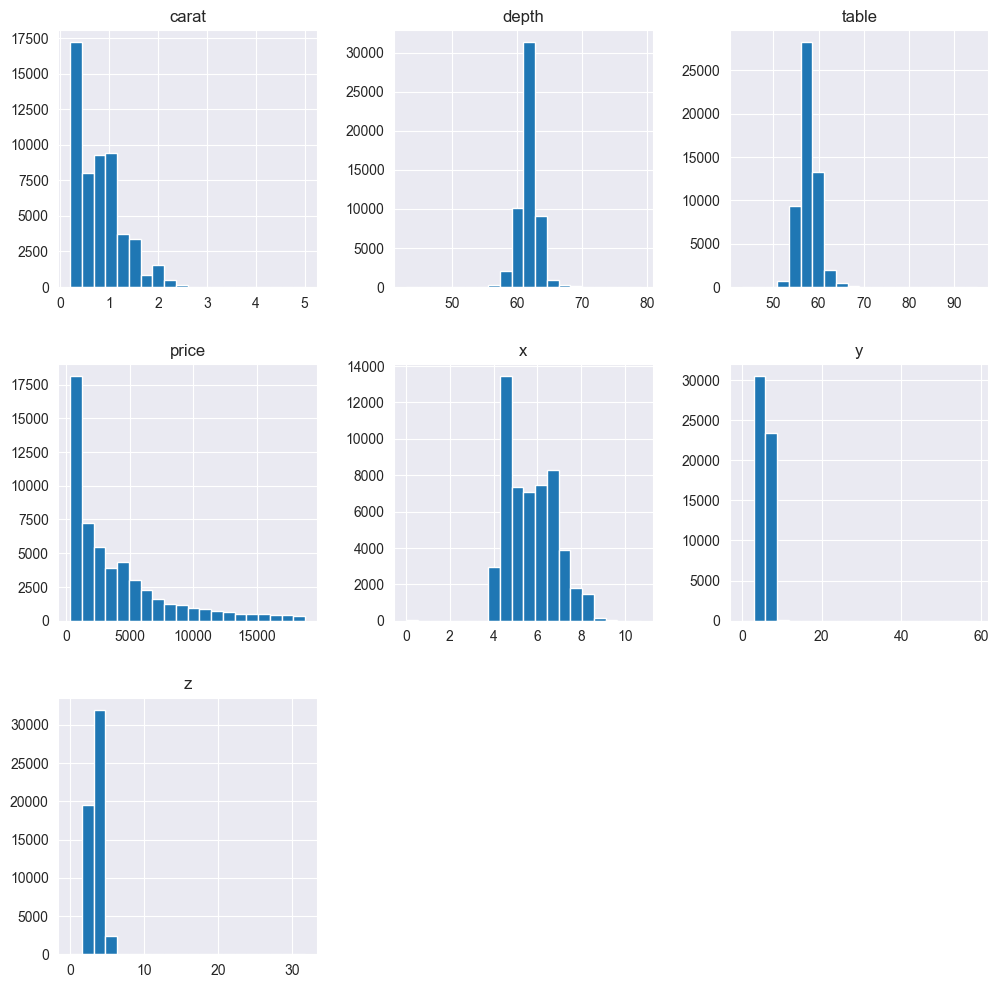

In [48]:
df.hist(figsize=(12, 12), bins=20)

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

Error in callback <function _draw_all_if_interactive at 0x0000019B9B3B4180> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

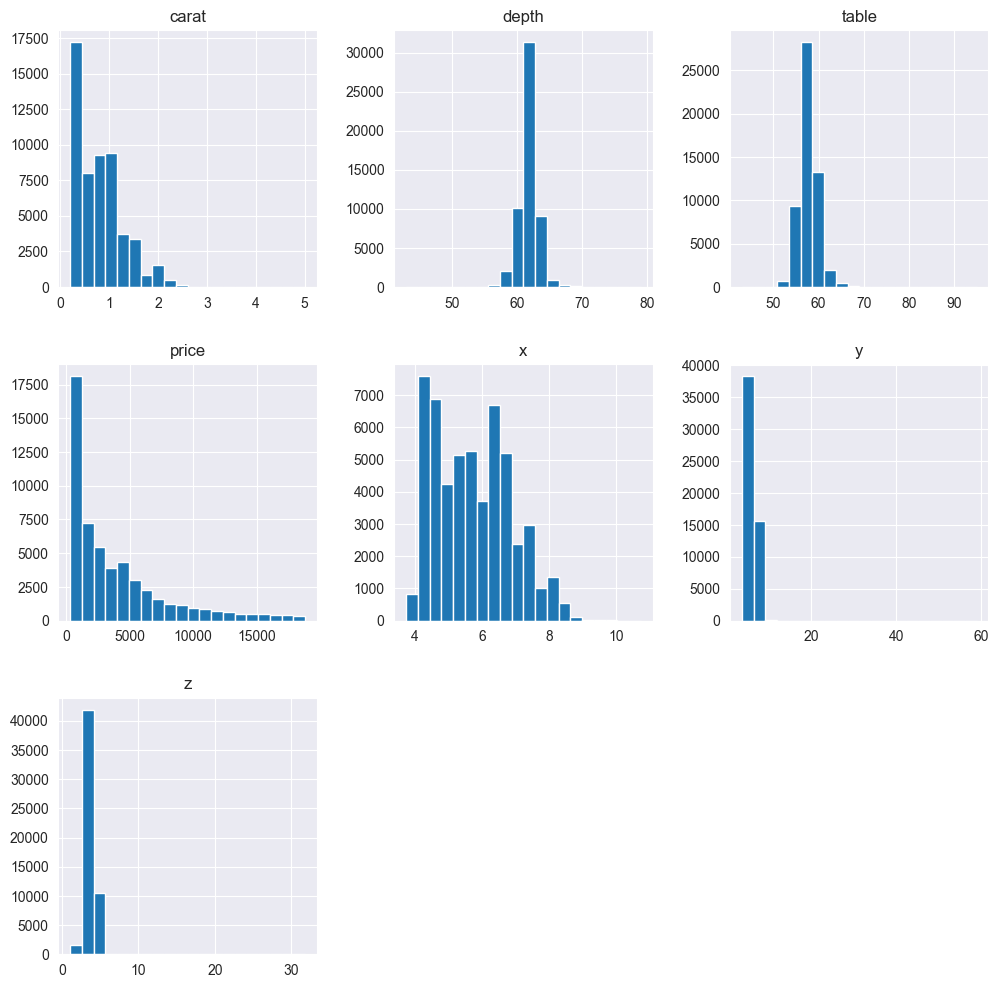

In [49]:
df = df.replace({"x": 0., "y": 0., "z": 0.}, np.nan)
df.hist(figsize=(12, 12), bins=20)

In [7]:
from scipy.stats import zscore

# Lista kolumn numerycznych
num_columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']


# Funkcja do wykrywania wartości odstających metodą IQR
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]


# Sprawdzenie wartości odstających dla każdej kolumny numerycznej
outliers_dict = {col: find_outliers_iqr(df, col) for col in num_columns}

# Wyświetlenie liczby wartości odstających w każdej kolumnie
for col, outliers in outliers_dict.items():
    print(f"{col}: {len(outliers)} wartości odstających")

carat: 1889 wartości odstających
depth: 2545 wartości odstających
table: 605 wartości odstających
price: 3540 wartości odstających
x: 24 wartości odstających
y: 22 wartości odstających
z: 29 wartości odstających


In [9]:
# Funkcja do obliczania liczby wartości odstających na podstawie Z-score
def count_outliers_zscore(df, column, threshold=3):
    z_scores = (df[column] - df[column].mean()) / df[column].std()
    return (np.abs(z_scores) > threshold).sum()


outliers_zscore = {col: count_outliers_zscore(df, col) for col in num_columns}

for col, outliers in outliers_dict.items():
    print(f"{col}: {len(outliers_zscore)} wartości odstających")


carat: 7 wartości odstających
depth: 7 wartości odstających
table: 7 wartości odstających
price: 7 wartości odstających
x: 7 wartości odstających
y: 7 wartości odstających
z: 7 wartości odstających


### Zadanie 2

Original shape: (214, 10)


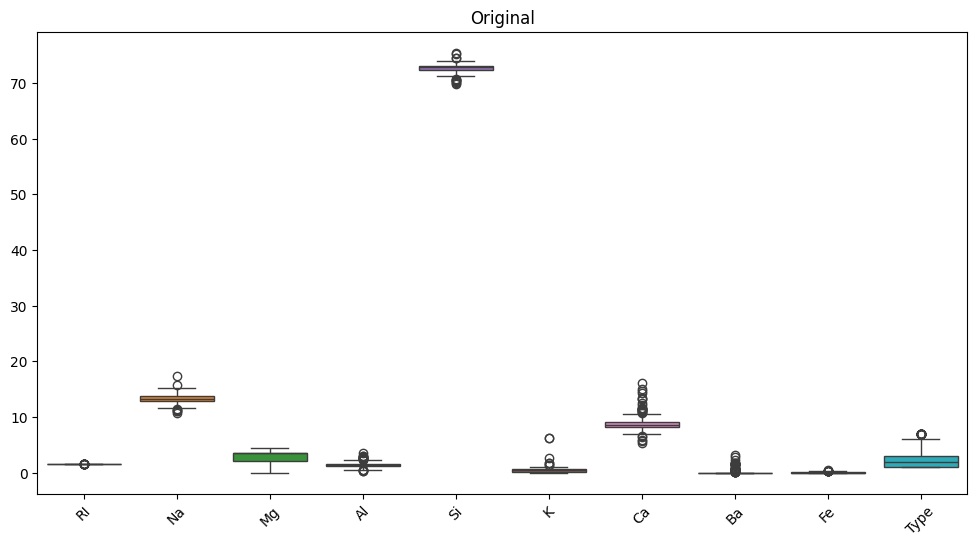

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv("glass.csv")
df.head()


# Function to plot boxplots
def plot_boxplots(df, title):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, orient="v")
    plt.xticks(rotation=45)
    plt.title(title)
    plt.show()


num_cols = df.select_dtypes(include=['number']).columns

print("Original shape:", df.shape)
plot_boxplots(df[num_cols], "Original")

Original shape: (214, 10)
After removing Z-score outliers: (194, 10)


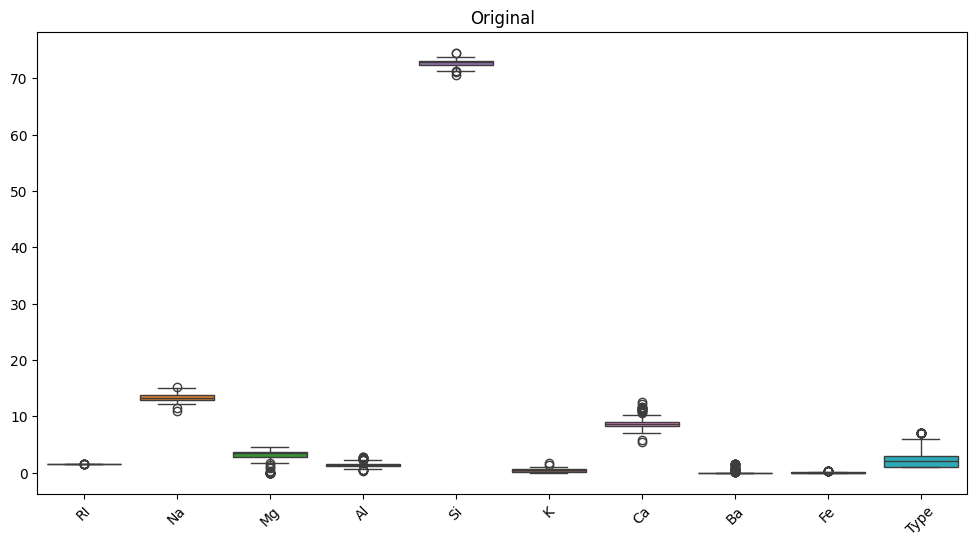

In [16]:
# Compute Z-score
z_scores = df[num_cols].apply(lambda x: (x - x.mean()) / x.std())

# Filter rows where any column has |Z| > 3
df_z = df[(z_scores.abs() <= 3).all(axis=1)]

# Check the new dataset shape
print("Original shape:", df.shape)
print("After removing Z-score outliers:", df_z.shape)
plot_boxplots(df_z[num_cols], "Original")

Original shape: (214, 10)
After removing IQR-based outliers: (165, 10)


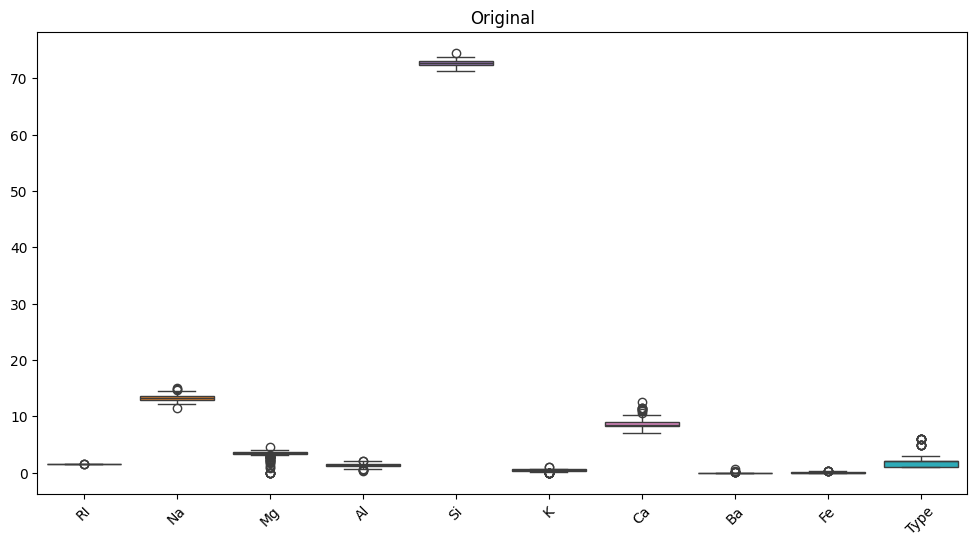

In [17]:
# Compute Q1, Q3, and IQR
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers per row
outlier_mask = ((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound)).sum(axis=1)

# Remove rows where at least 2 columns have outliers
df_iqr = df[outlier_mask < 2]

# Check the new dataset shape
print("Original shape:", df.shape)
print("After removing IQR-based outliers:", df_iqr.shape)
plot_boxplots(df_iqr[num_cols], "Original")


### Zadanie 3

In [35]:
df = pd.read_csv("censusData-with3errors.csv", skipinitialspace=True)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [36]:
# Check for non-numeric values in numeric columns
for col in df.select_dtypes(include=['number']).columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check for inconsistencies in categorical columns
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}:", df[col].unique())


workclass: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
marital-status: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relationship: ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
race: ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
sex: ['Male' 'Female']
native-country: ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' '

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

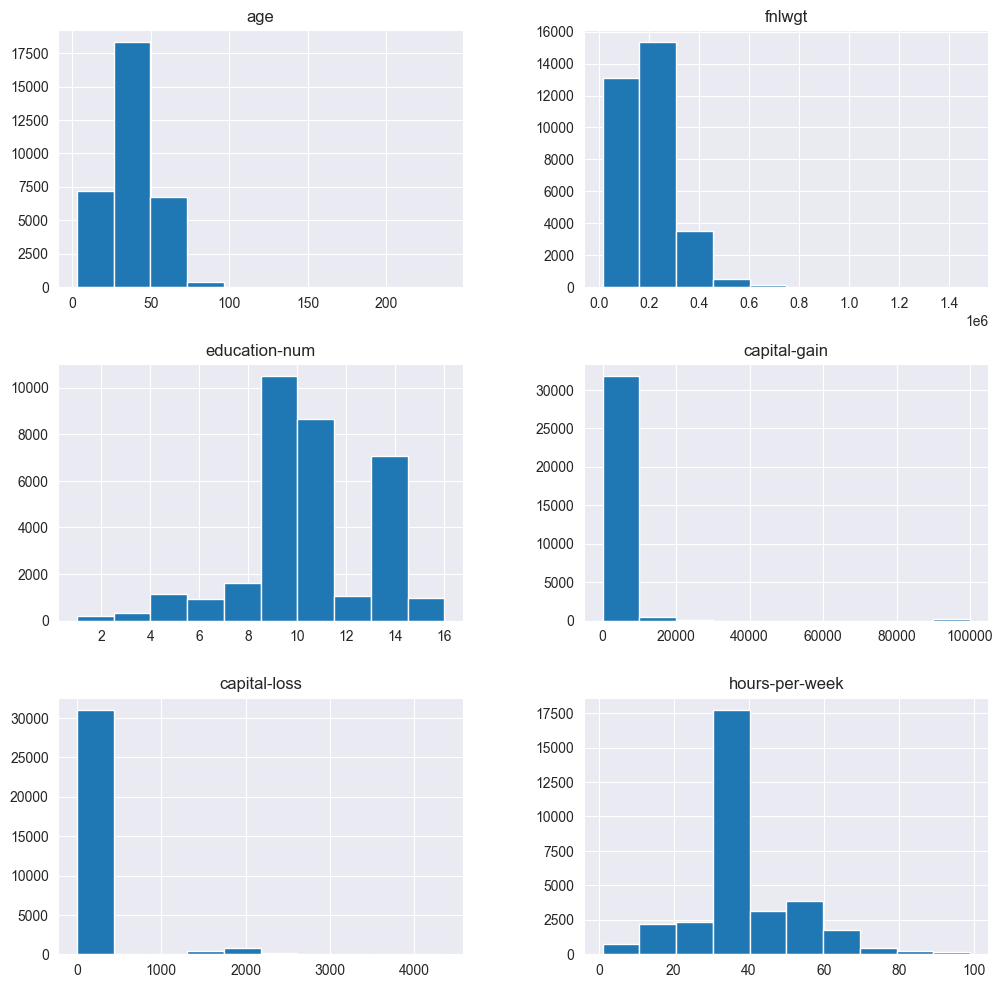

In [37]:
df.hist(figsize=(12, 12))

<Axes: >

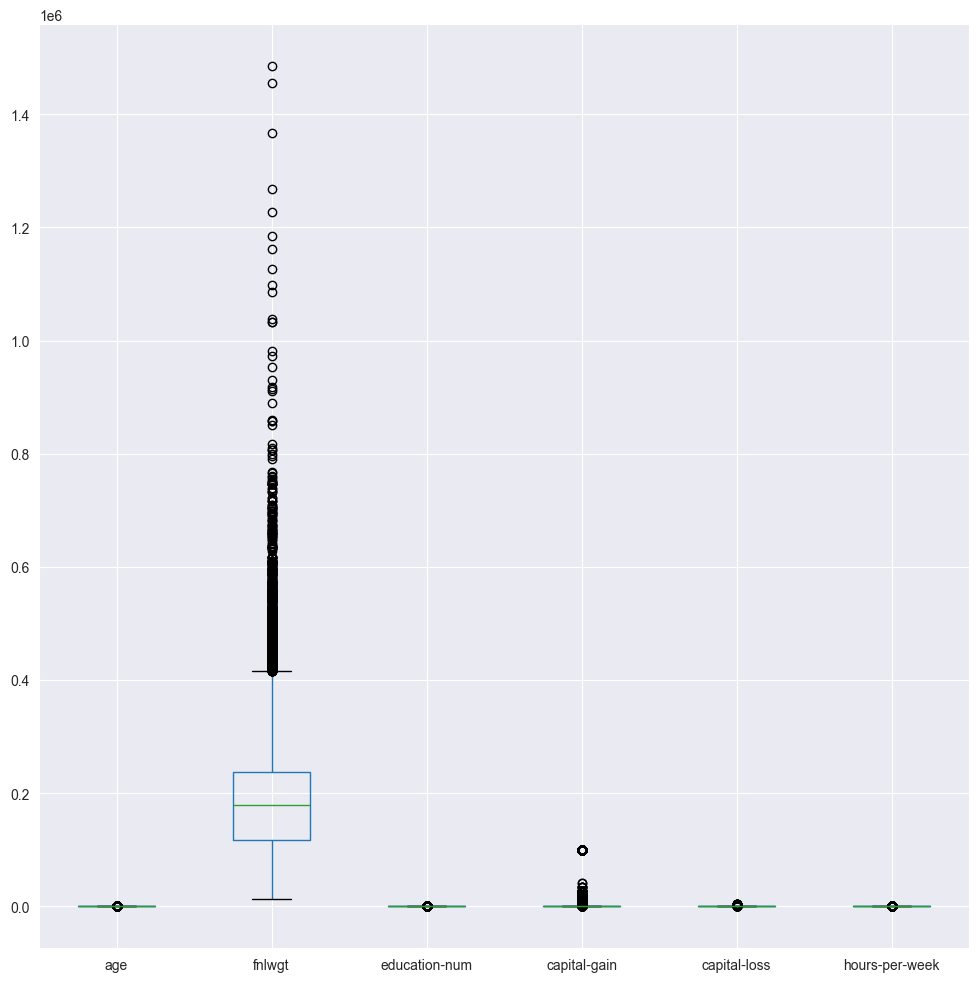

In [38]:
df.boxplot(figsize=(12, 12))

In [39]:
df['native-country'] = df['native-country'].str.strip().replace('Unimed-States', 'United-States')

In [63]:
def fix_errors(value):
    if isinstance(value, str) and value.strip() in ["?", "error", "unknown"]:  # Example errors
        return pd.NA
    return value


# Apply to all columns
df = df.apply(fix_errors)

In [41]:
# Check for non-numeric values in numeric columns
for col in df.select_dtypes(include=['number']).columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check for inconsistencies in categorical columns
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}:", df[col].unique())

workclass: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' <NA>
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
marital-status: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' <NA>
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relationship: ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
race: ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
sex: ['Male' 'Female']
native-country: ['United-States' 'Cuba' 'Jamaica' 'India' <NA> 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England

### Zadanie 4

In [67]:
df = pd.read_csv("censusData-with3errors.csv", na_values='?', skipinitialspace=True)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [68]:
# Count the number of missing values in each row
missing_count = df.isna().sum(axis=1)

# Find the rows with the most missing values
max_missing_rows = missing_count.max()
rows_with_max_missing = missing_count[missing_count == max_missing_rows]

# Print the rows with the most missing values
print(rows_with_max_missing)

61       3
297      3
1152     3
1676     3
2513     3
3131     3
3579     3
3834     3
6059     3
7862     3
9616     3
11614    3
12996    3
16488    3
16838    3
18615    3
20333    3
20480    3
23729    3
23915    3
25359    3
26296    3
26363    3
28194    3
28688    3
30369    3
32525    3
dtype: int64


In [69]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isna().mean() * 100

# Identify columns with less than 3% missing values
cols_with_less_than_3_percent_missing = missing_percentage[(missing_percentage > 0) & (missing_percentage < 3)].index

cols_with_less_than_3_percent_missing

Index(['native-country'], dtype='object')

In [70]:
# Replace missing values in these columns with the most frequent value (mode)
for col in cols_with_less_than_3_percent_missing:
    # Get the most frequent value (mode) for the column
    most_frequent_value = df[col].mode()[0]
    
    # Replace missing values with the most frequent value
    df[col] = df[col].fillna(most_frequent_value)

# Check the updated DataFrame
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [71]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isna().mean() * 100

# Identify columns with less than 3% missing values
cols_with_less_than_3_percent_missing = missing_percentage[(missing_percentage > 0) & (missing_percentage < 3)].index

cols_with_less_than_3_percent_missing

Index([], dtype='object')

In [72]:
# Drop columns that still contain any missing values
df_cleaned = df.dropna(axis=1, how='any')

# Check the updated DataFrame
df_cleaned.head()

,age,fnlwgt,education,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,77516,Bachelors,13,Never-married,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,83311,Bachelors,13,Married-civ-spouse,Husband,White,Male,0,0,13,United-States,<=50K
2,38,215646,HS-grad,9,Divorced,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,234721,11th,7,Married-civ-spouse,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,338409,Bachelors,13,Married-civ-spouse,Wife,Black,Female,0,0,40,Cuba,<=50K


In [75]:
columns_with_missing_values = df.columns[df.isna().any()]

columns_with_missing_values

Index(['workclass', 'occupation'], dtype='object')

In [79]:
df_cleaned = df.dropna(axis=1, how='any')

# Sprawdź, czy zostały usunięte
print("Pozostałe kolumny po usunięciu tych z brakującymi wartościami:")
print(df_cleaned.columns)

Pozostałe kolumny po usunięciu tych z brakującymi wartościami:
Index(['age', 'fnlwgt', 'education', 'education-num', 'marital-status',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')


In [80]:
columns_with_missing_values = df_cleaned.columns[df_cleaned.isna().any()]

columns_with_missing_values

Index([], dtype='object')